## EDA 1


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('BIKE DETAILS.csv')

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
df.name.nunique()

279

In [8]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [9]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [10]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [11]:
df.ex_showroom_price.mean()

np.float64(87958.71405750798)

In [12]:
#df.fillna(df.ex_showroom_price.mean(),inplace=True)

In [13]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


1. What is the range of selling prices in the dataset.

In [14]:
max_selling_price = df['ex_showroom_price'].max()
min_selling_price = df['ex_showroom_price'].min()

print(f"Maximum selling price: {max_selling_price}")
print(f"Minimum selling price: {min_selling_price}")


Maximum selling price: 1278000.0
Minimum selling price: 30490.0


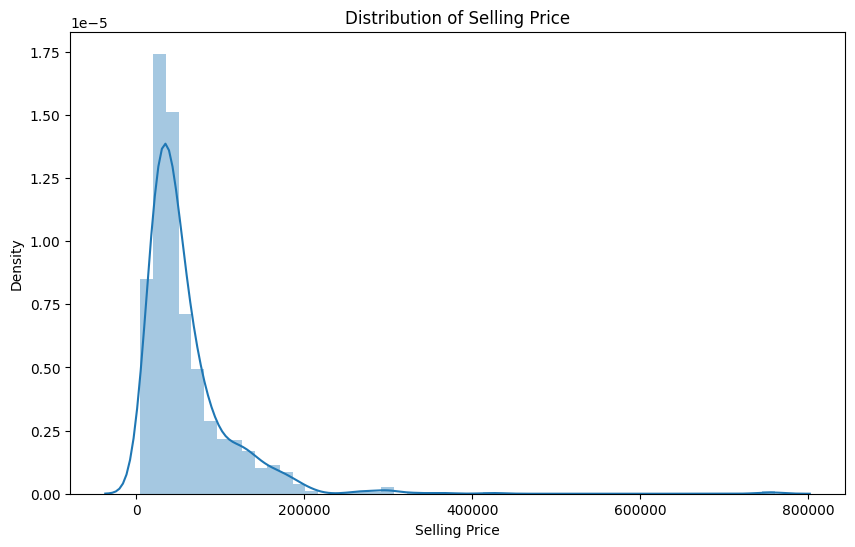

In [15]:
plt.figure(figsize=(10, 6))
sns.distplot(df['selling_price'])
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()


In [16]:
#insight : Maximun price of bike lie below 200000

2. What is the median selling price for bikes in the dataset.

In [17]:
# prompt: What is the median selling price for bikes in the datasetD

median_selling_price = df['selling_price'].median()
print(f"Median selling price: {median_selling_price}")


Median selling price: 45000.0


3. What is the most common seller typeD

In [18]:
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller_type}")


Most common seller type: Individual


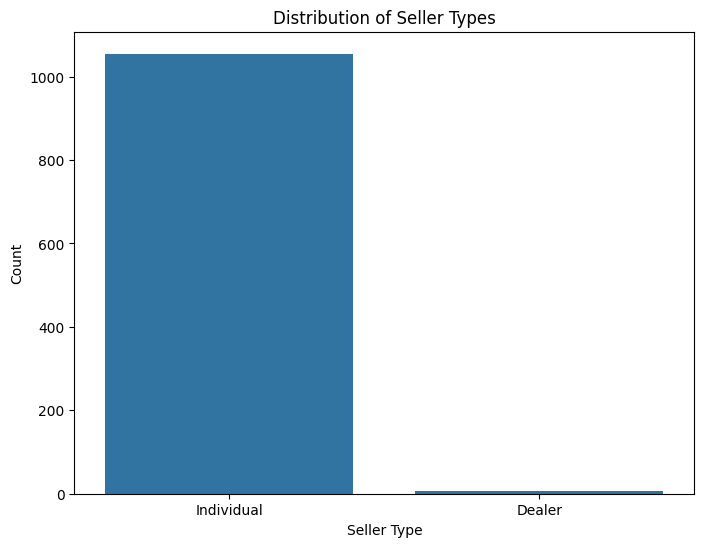

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='seller_type', data=df)
plt.title('Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()


4. How many bikes have driven more than 50,000 kilometers

In [20]:
bikes_over_50k_km = len(df[df['km_driven'] > 50000])
print(f"Number of bikes driven more than 50,000 km: {bikes_over_50k_km}")


Number of bikes driven more than 50,000 km: 170


Number of bikes driven more than 50,000 km: 170


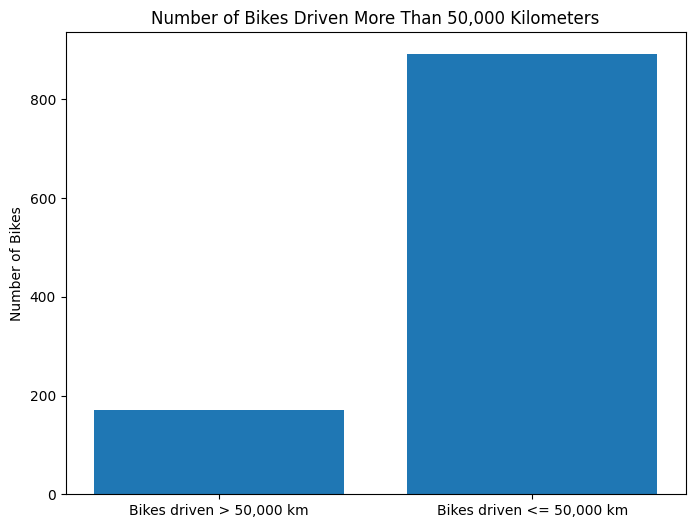

In [21]:
bikes_over_50k_km = len(df[df['km_driven'] > 50000])
print(f"Number of bikes driven more than 50,000 km: {bikes_over_50k_km}")

plt.figure(figsize=(8, 6))
plt.bar(['Bikes driven > 50,000 km', 'Bikes driven <= 50,000 km'], [bikes_over_50k_km, len(df) - bikes_over_50k_km])
plt.title('Number of Bikes Driven More Than 50,000 Kilometers')
plt.ylabel('Number of Bikes')
plt.show()


5. What is the average km_driven value for each ownership type

In [22]:
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print(f"Average km_driven by ownership type:\n{average_km_driven_by_ownership}")


Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


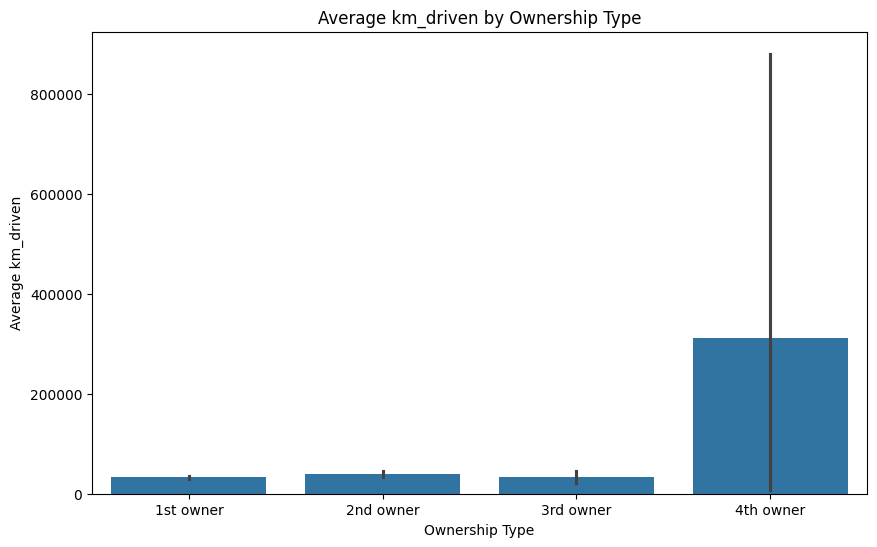

In [23]:

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='km_driven', data=df)
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.show()


6. What proportion of bikes are from the year 2015 or older.

Proportion of bikes from 2015 or older: 0.5664467483506126


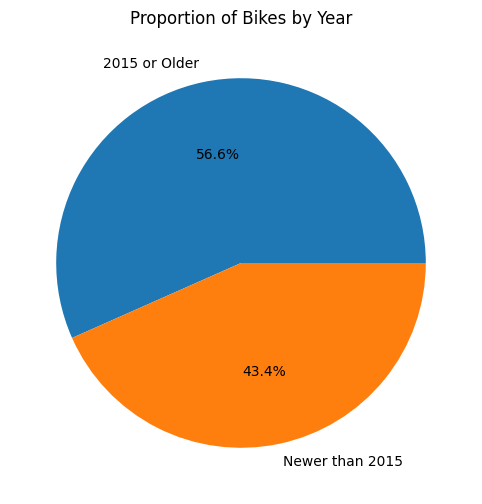

In [24]:
proportion_2015_older = len(df[df['year'] <= 2015]) / len(df)
print(f"Proportion of bikes from 2015 or older: {proportion_2015_older}")

plt.figure(figsize=(8, 6))
plt.pie([len(df[df['year'] <= 2015]), len(df[df['year'] > 2015])], labels=['2015 or Older', 'Newer than 2015'], autopct='%1.1f%%')
plt.title('Proportion of Bikes by Year')
plt.show()


7. What is the trend of missing values across the dataset

In [25]:
print(df.isnull().sum())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike

In [26]:
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is: {highest_ex_showroom_price}")
print(f"The bike with the highest ex_showroom_price is: {bike_with_highest_price}")


The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom_price is: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type

In [27]:
seller_type_counts = df.groupby('seller_type')['name'].count()
print(f"Total number of bikes listed by each seller type:\n{seller_type_counts}")


Total number of bikes listed by each seller type:
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


10.  What is the relationship between selling_price and km_driven for first-owner bikes?

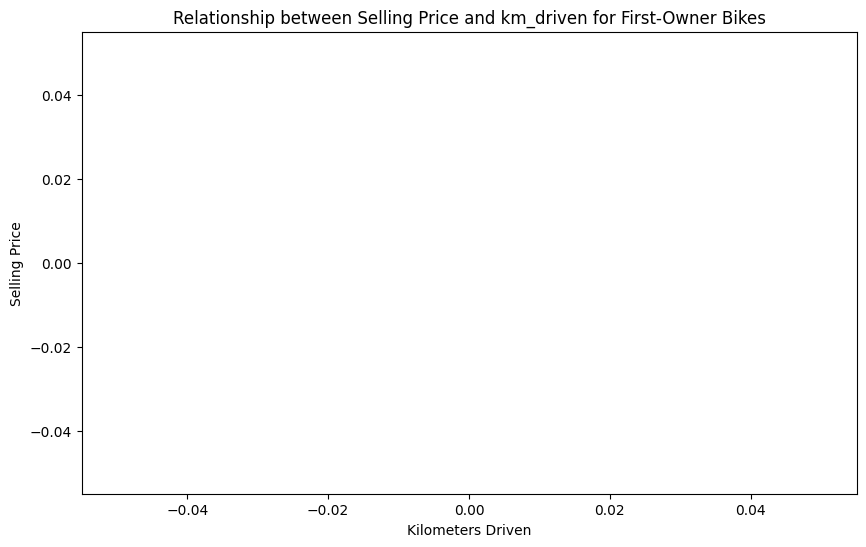

Correlation between km_driven and selling_price for first-owner bikes: nan


In [28]:
first_owner_bikes = df[df['owner'] == 'First Owner']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between km_driven and selling_price for first-owner bikes: {correlation}")


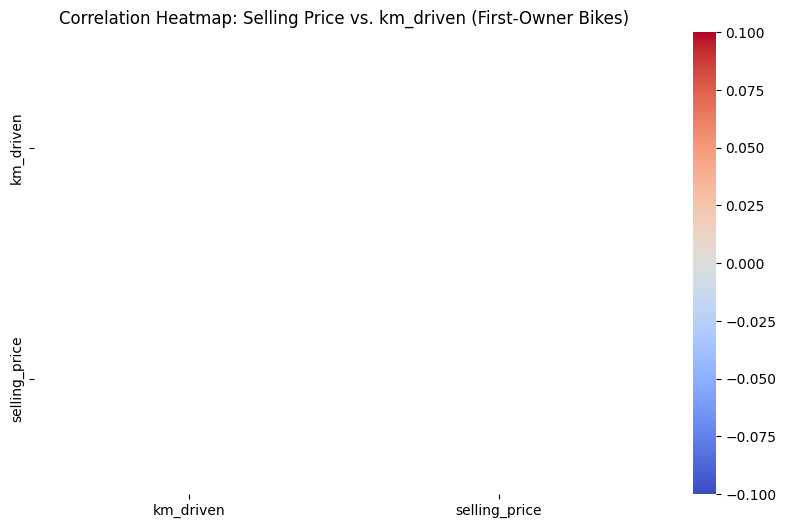

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(first_owner_bikes[['km_driven', 'selling_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Selling Price vs. km_driven (First-Owner Bikes)')
plt.show()

# Insight:
# The heatmap and the correlation coefficient show the relationship between 'km_driven' and 'selling_price' for first-owner bikes.
# A correlation close to zero suggests a weak linear relationship.


11. Identify and remove outliers in the km_driven column using the IQR method.

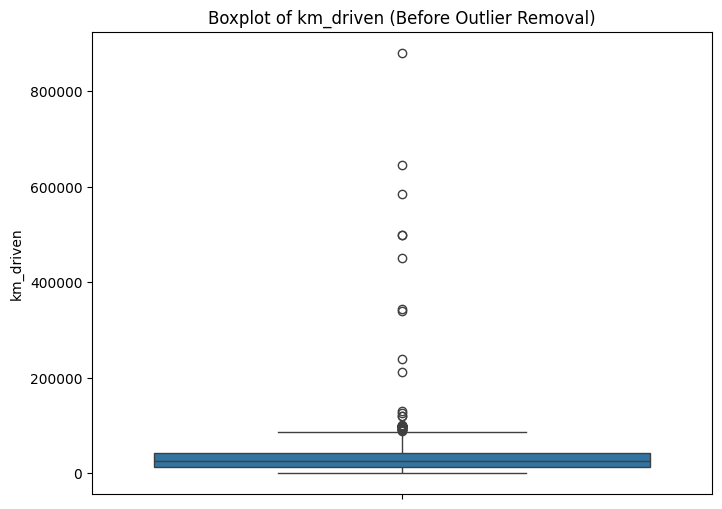

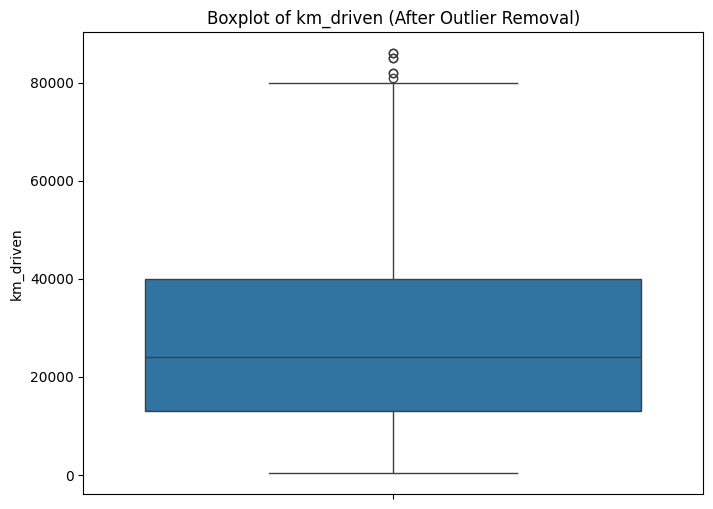

Insights:
Number of outliers removed: 39
Original dataset size: 1061
Dataset size after removing outliers: 1022
Lower bound: -30750.0
Upper bound: 87250.0


In [30]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['km_driven'])
plt.title('Boxplot of km_driven (Before Outlier Removal)')
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df_no_outliers['km_driven'])
plt.title('Boxplot of km_driven (After Outlier Removal)')
plt.show()

# Insight
print("Insights:")
print(f"Number of outliers removed: {len(outliers)}")
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")



12. Perform a bivariate analysis to visualize the relationship between year and selling_price

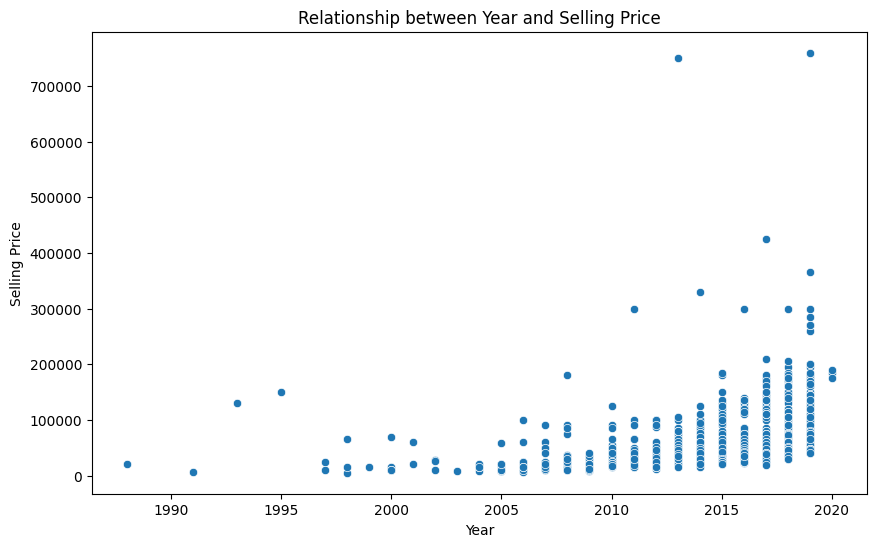

Correlation between year and selling_price: 0.402188400614744


In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

correlation = df['year'].corr(df['selling_price'])
print(f"Correlation between year and selling_price: {correlation}")



In [32]:
# Insight:
# The scatter plot and correlation coefficient show the relationship between the year of the bike and its selling price.
# A positive correlation suggests that newer bikes tend to have higher selling prices.

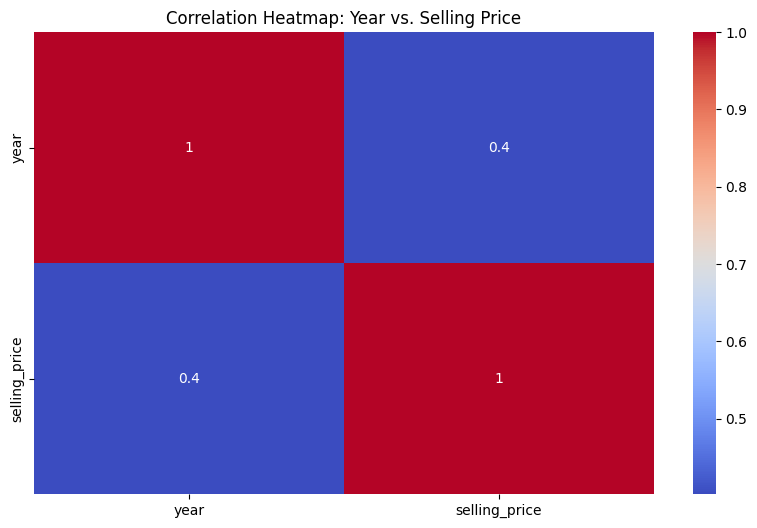

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['year', 'selling_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Year vs. Selling Price')
plt.show()

# Insight:
# The heatmap visually represents the correlation between 'year' and 'selling_price'.
# A positive correlation value indicates that as the year increases (newer bikes), the selling price tends to increase as well.


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year).

bike_age
3          0.000000
4      63643.821705
5      95672.959288
6     104438.596491
7     124864.314642
8     126833.333333
9     134665.201465
10    132196.347032
11    147584.933333
12    147677.612022
13    151540.000000
14    161065.476190
15    149044.047619
16    158405.747126
17    159953.333333
18    166354.761905
19    168233.333333
20    175333.333333
21    162666.666667
22    143333.333333
23    162500.000000
24    168333.333333
25    155000.000000
26    165833.333333
28     33333.333333
30     53333.333333
32    177333.333333
35    163333.333333
Name: selling_price, dtype: float64


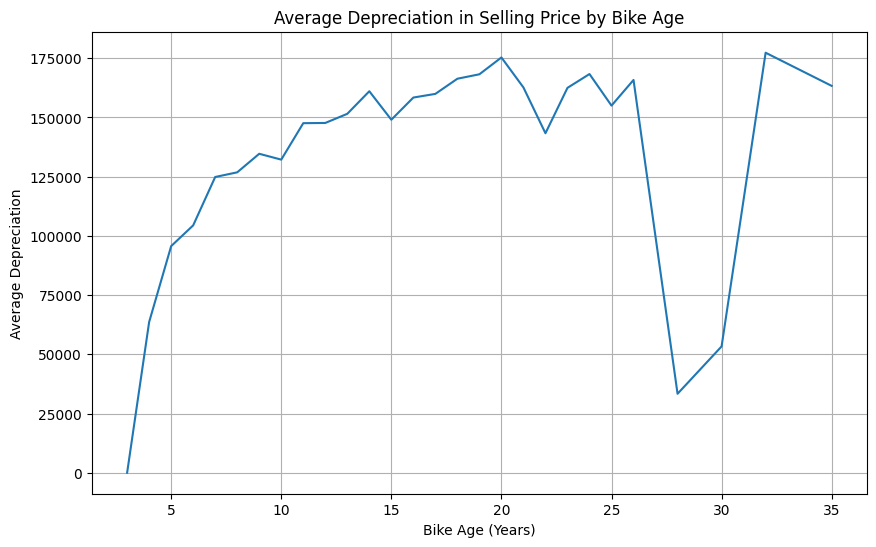

In [34]:
current_year = 2023
df['bike_age'] = current_year - df['year']

average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean()


depreciation_by_age = average_selling_price_by_age.iloc[0] - average_selling_price_by_age

print(depreciation_by_age)

plt.figure(figsize=(10, 6))
plt.plot(depreciation_by_age.index, depreciation_by_age.values)
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Depreciation")
plt.title("Average Depreciation in Selling Price by Bike Age")
plt.grid(True)
plt.show()


14. Which bike names are priced significantly above the average price for their manufacturing year


In [35]:
average_price_by_year = df.groupby('year')['ex_showroom_price'].mean()

df['average_price_for_year'] = df['year'].map(average_price_by_year)


std_dev_price = df['ex_showroom_price'].std()
df['price_difference'] = df['ex_showroom_price'] - df['average_price_for_year']
significantly_above_average = df[df['price_difference'] > 2 * std_dev_price]


print(significantly_above_average[['name', 'year', 'ex_showroom_price', 'average_price_for_year']])


                               name  year  ex_showroom_price  \
13                    Yamaha YZF R3  2019           351680.0   
134      Harley-Davidson Street Bob  2013          1278000.0   
289  Kawasaki Ninja 650 [2018-2019]  2017           599000.0   
291             Kawasaki Ninja 250R  2010           317934.0   
295                 Suzuki GSX S750  2019           752020.0   
311      Harley-Davidson Street 750  2014           534000.0   
344                      BMW G310GS  2018           349000.0   
860  Kawasaki Ninja 650 [2018-2019]  2011           589000.0   
897              Kawasaki Ninja 300  2016           360000.0   
966                  Hyosung GT250R  2016           345000.0   
972                   KTM 390 Duke   2016           240000.0   

     average_price_for_year  
13            114079.562500  
134            95435.943396  
289            92835.494118  
291            77716.071429  
295           114079.562500  
311            83958.636364  
344           100860.

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

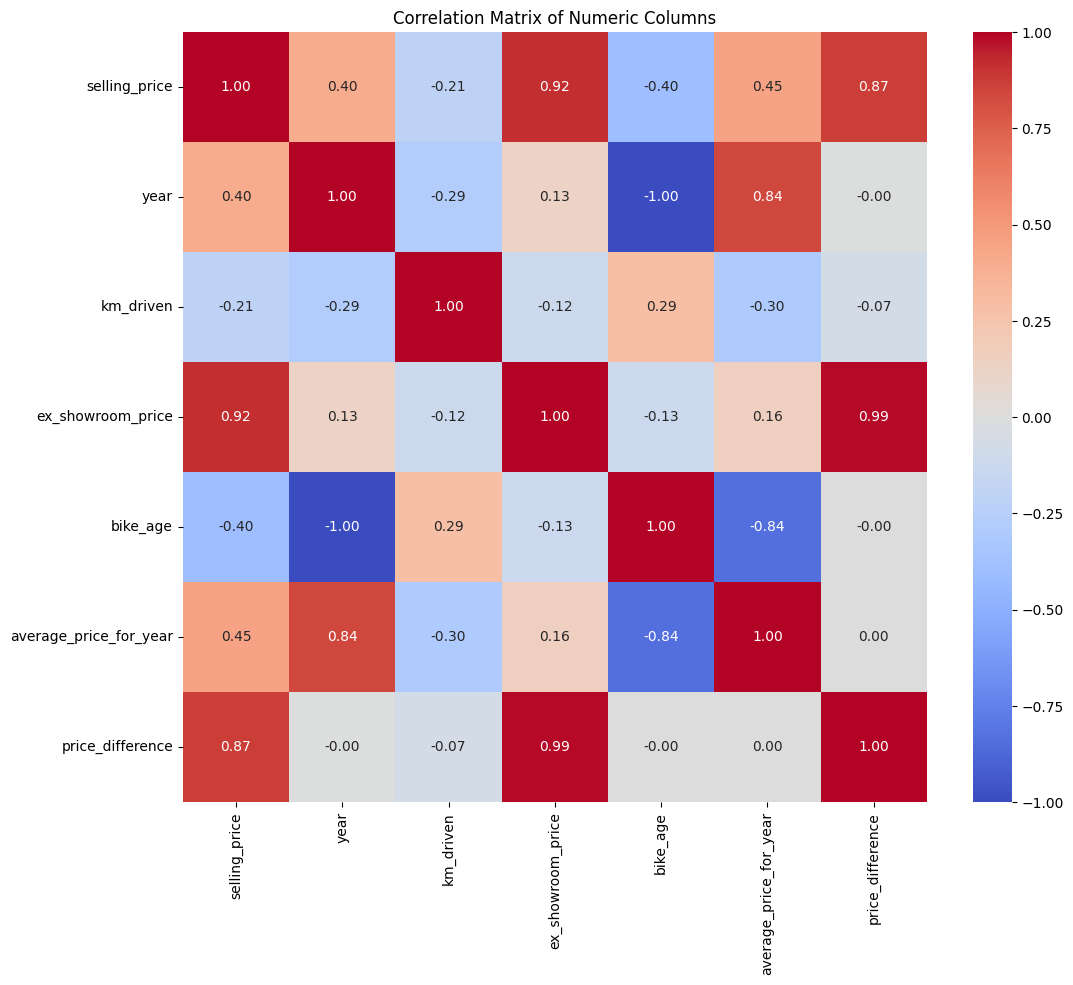

In [36]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# **EDA 2**

In [37]:
df2=pd.read_csv('Car Sale.csv')

In [38]:
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [39]:
df2.shape

(23906, 16)

In [40]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers.

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

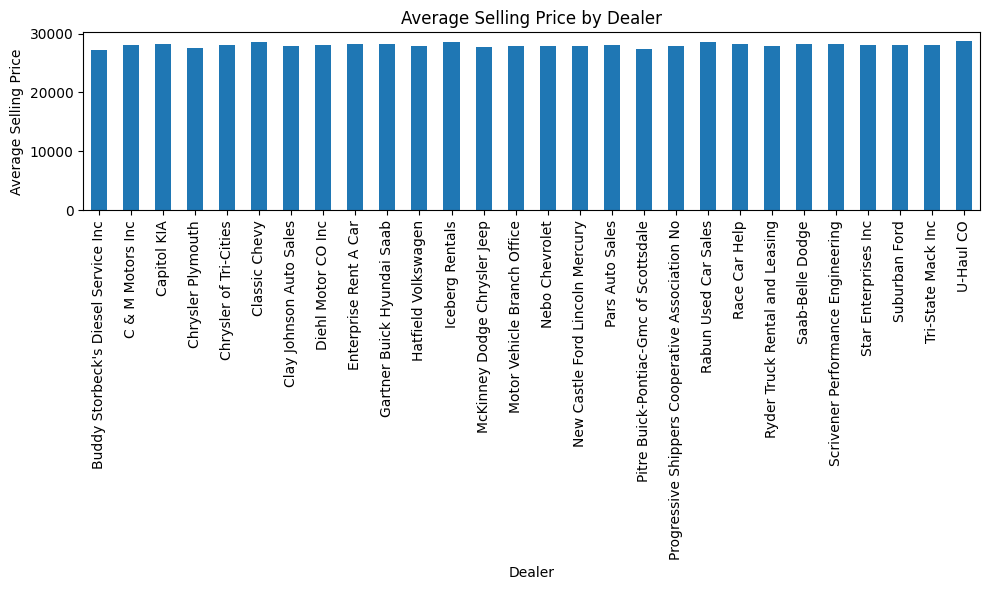

In [41]:
average_selling_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean()

# Print the result
print(average_selling_price_by_dealer)

# Visualize the comparison using a bar plot
plt.figure(figsize=(10, 6))
average_selling_price_by_dealer.plot(kind='bar')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends.

The car brand with the highest price variation is: Lincoln
The amount of variation is: 19658.050211265567


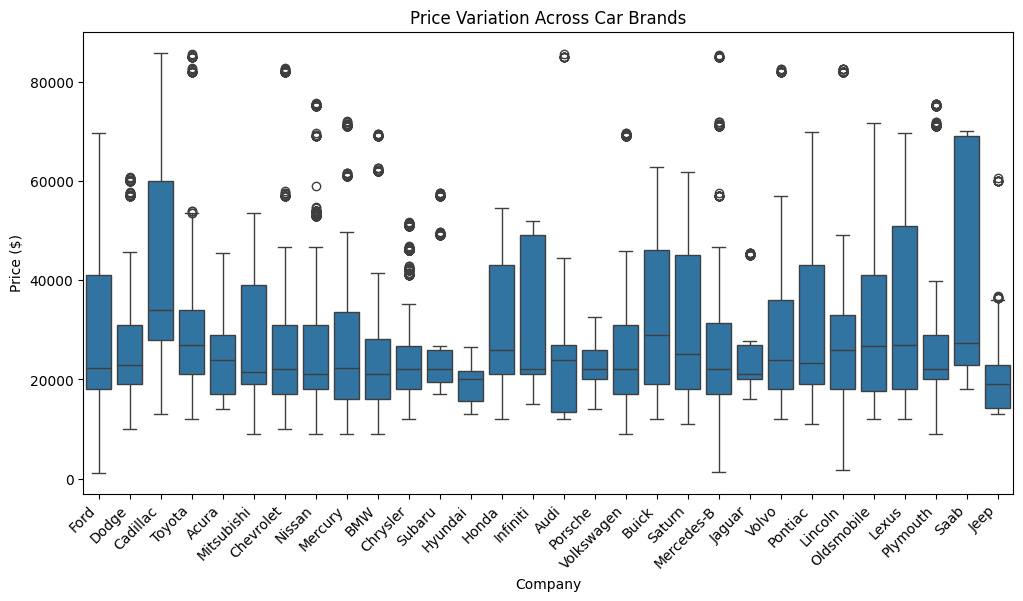

In [42]:
price_variation_by_brand = df2.groupby('Company')['Price ($)'].std()


highest_variation_brand = price_variation_by_brand.idxmax()
highest_variation_amount = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is: {highest_variation_brand}")
print(f"The amount of variation is: {highest_variation_amount}")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price ($)', data=df2)
plt.title('Price Variation Across Car Brands')
plt.xticks(rotation=45, ha='right') #rotate x-axis labels for readability
plt.show()

#Interpretation:
#A high price variation for a particular brand could indicate several factors:
# * A wide range of models: The brand might offer vehicles from various segments (budget-friendly to luxury), leading to diverse price points.
# * Different features and trims:  Even within the same model, different trims or feature packages could significantly affect the price.
# * Model year variations: Older models of the same brand might be priced lower than newer versions.
# * Market conditions and demand: Fluctuations in demand for specific models can influence prices.
# * Geographic location: Pricing may vary based on regional market conditions.


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare

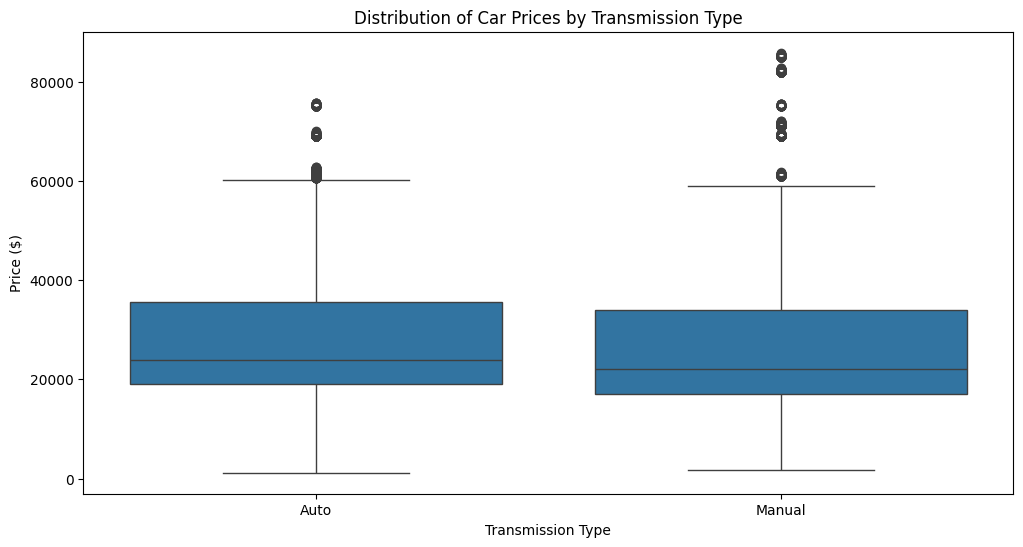

,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

# Calculate IQR for each transmission type
transmission_iqr = df2.groupby('Transmission')['Price ($)'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))

transmission_iqr


4. What is the distribution of car prices across different regionsE

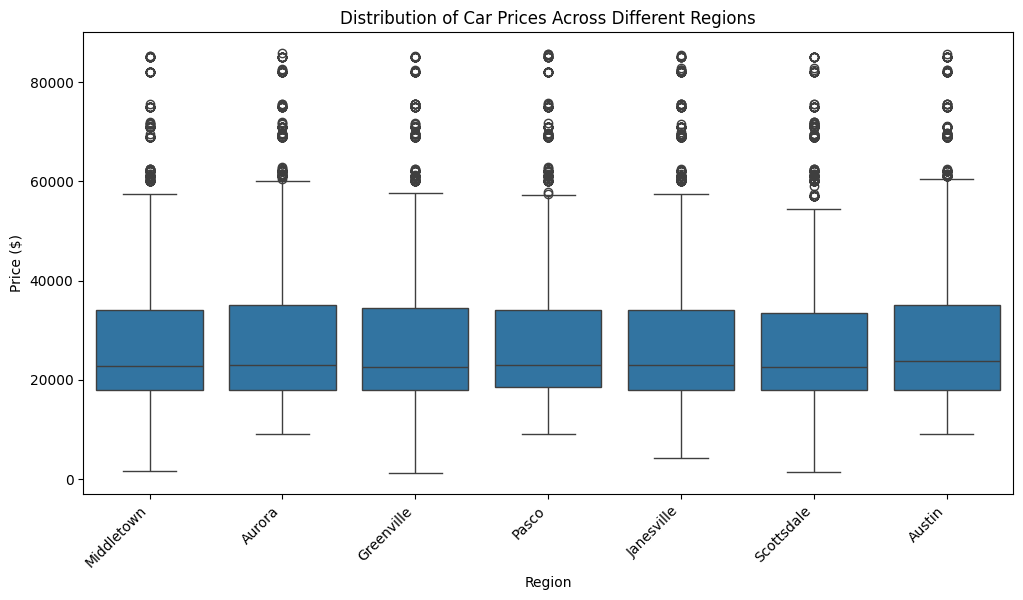

In [44]:
# prompt: What is the distribution of car prices across different regionsE

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


5.  What is the distribution of cars based on body stylesE

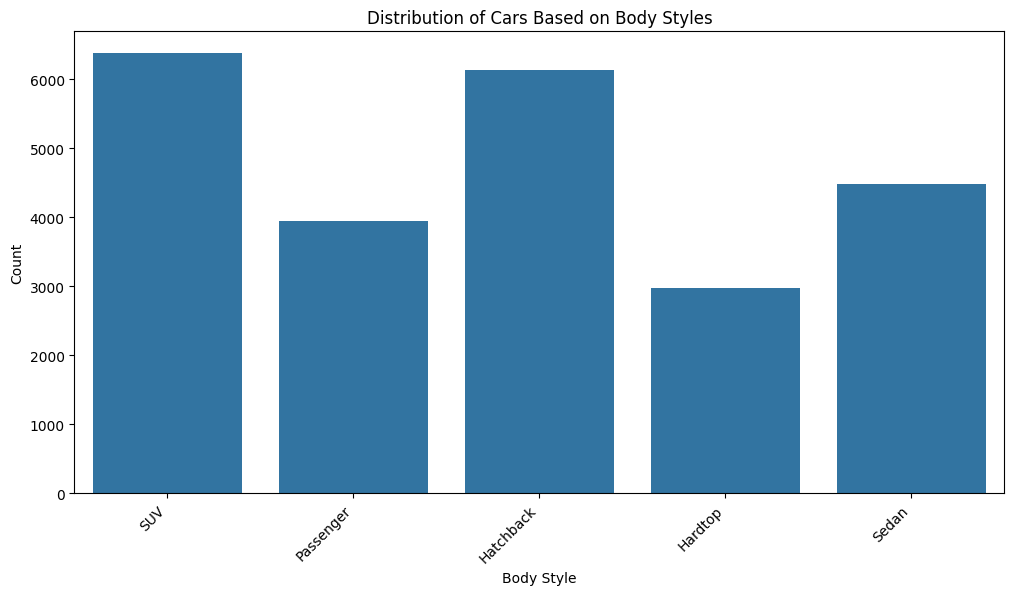

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Body Style', data=df2)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


6. How does the average selling price of cars vary by customer gender and annual incomeE

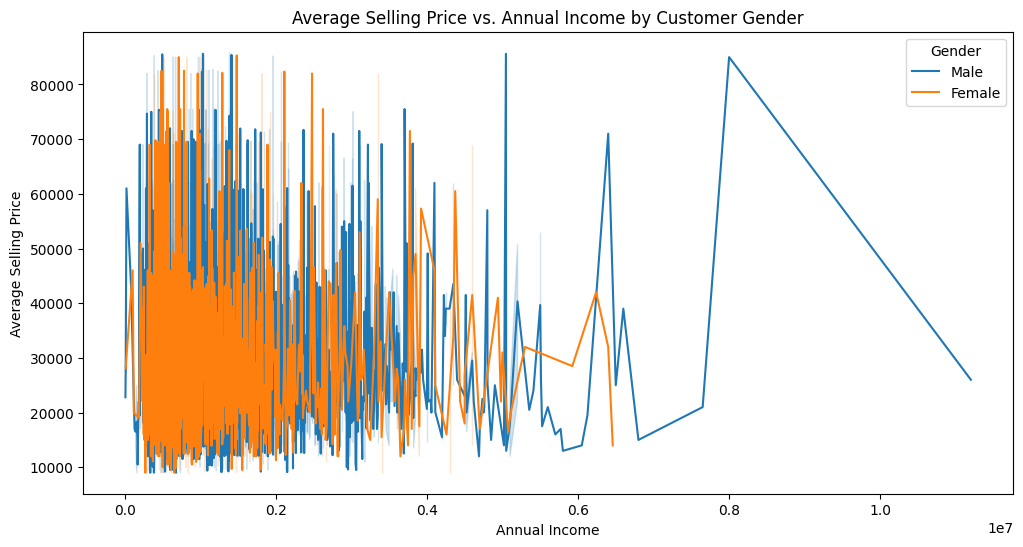

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df2' is your DataFrame and it contains columns 'Customer_Gender', 'Annual_Income', and 'Price ($)'
# Replace 'Price ($)' with your actual column name if different

plt.figure(figsize=(12, 6))
sns.lineplot(x='Annual Income', y='Price ($)', hue='Gender', data=df2)
plt.title('Average Selling Price vs. Annual Income by Customer Gender')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

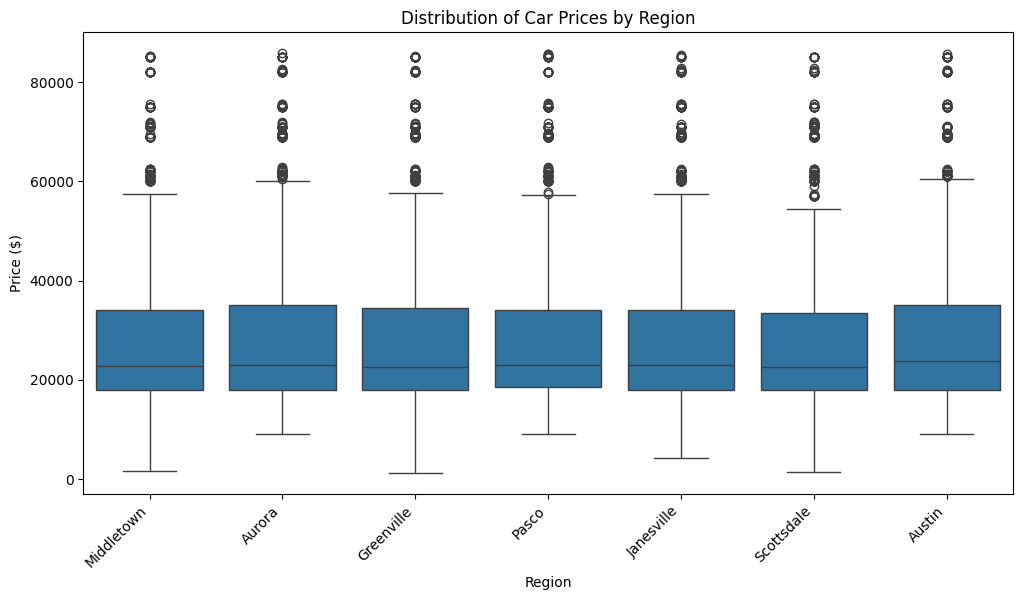

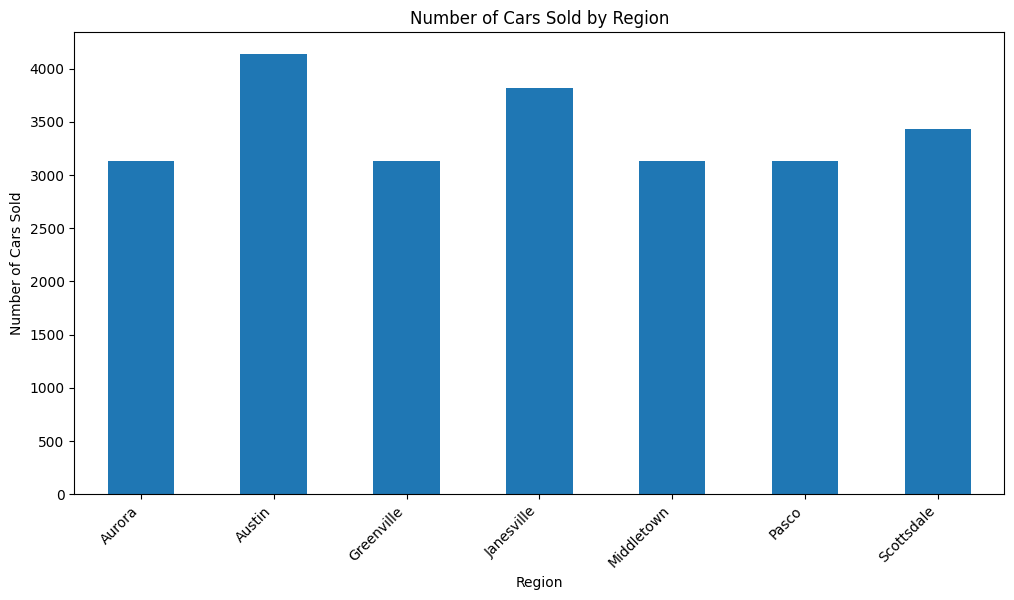

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

cars_sold_by_region = df2.groupby('Dealer_Region')['Price ($)'].count()

plt.figure(figsize=(12, 6))
cars_sold_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


8. How does the average car price differ between cars with different engine sizesE

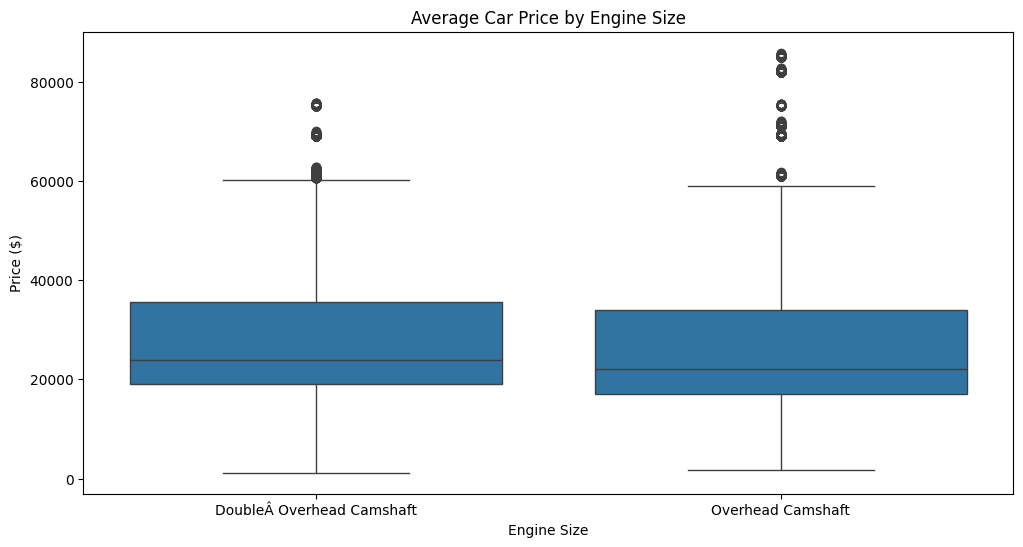

In [48]:
# prompt: How does the average car price differ between cars with different engine sizesE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df2' is your DataFrame and it contains columns 'Engine Size' and 'Price ($)'
# Replace 'Price ($)' and 'Engine Size' with your actual column names if different

plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', data=df2)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()


9. How do car prices vary based on the customer’s annual income bracket

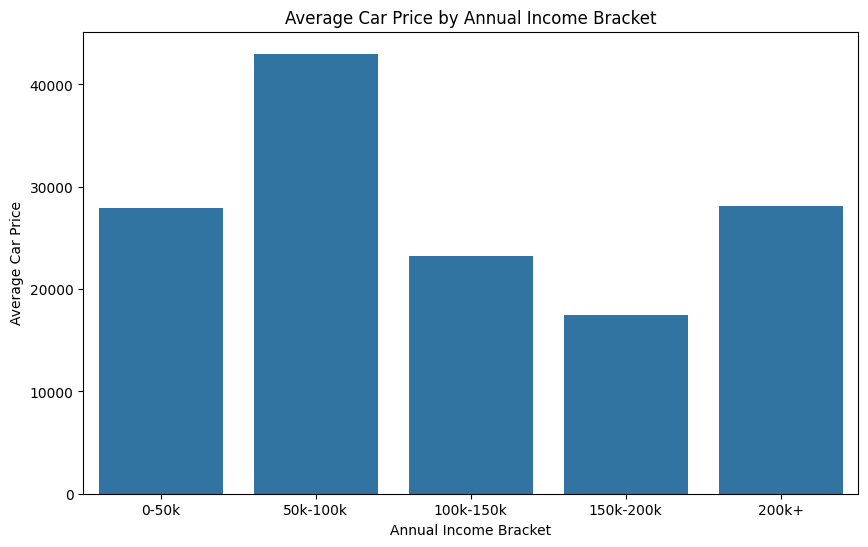

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create income brackets (adjust these as needed)
income_brackets = [0, 50000, 100000, 150000, 200000, float('inf')]  # Example brackets
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

# Assign income brackets to each customer
df2['Income_Bracket'] = pd.cut(df2['Annual Income'], bins=income_brackets, labels=income_labels, right=False)

# Calculate the average price for each income bracket
average_price_by_income = df2.groupby('Income_Bracket')['Price ($)'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_income.index, y=average_price_by_income.values)
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price')
plt.show()


10. What are the top 5 car models with the highest number of sales, and how does their price distribution lookE

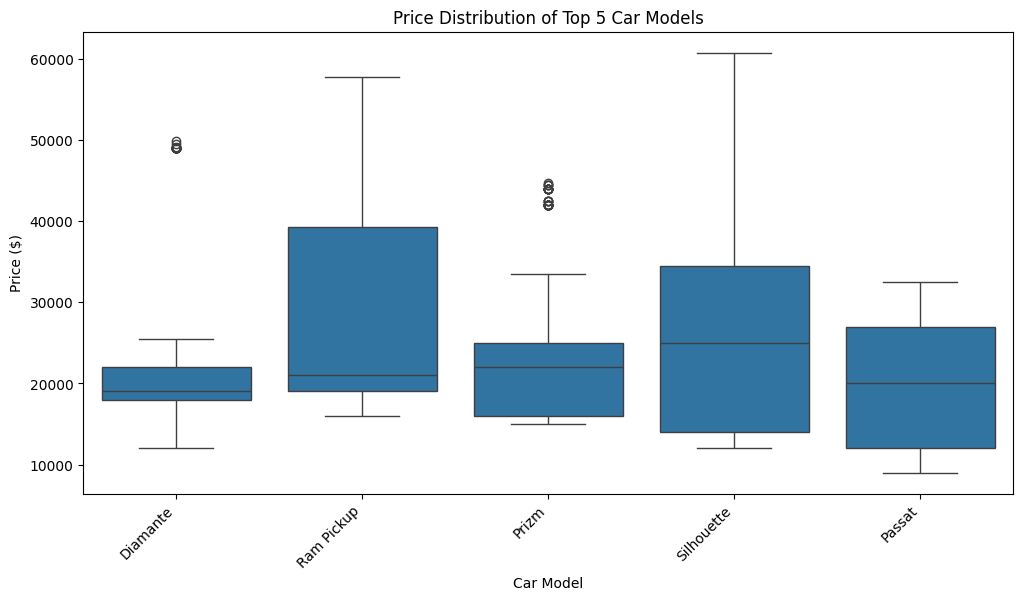

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64


In [50]:
# prompt: What are the top 5 car models with the highest number of sales, and how does their price distribution lookE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df2' is your DataFrame and it contains columns 'Model' and 'Price ($)'
# Replace 'Model' and 'Price ($)' with your actual column names if different

# Calculate the number of sales for each car model
sales_by_model = df2.groupby('Model')['Price ($)'].count().sort_values(ascending=False)

# Get the top 5 car models
top_5_models = sales_by_model.head(5).index

# Filter the DataFrame to include only the top 5 models
top_5_df = df2[df2['Model'].isin(top_5_models)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_df)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the sales figures for the top 5 models
print(sales_by_model.head(5))


11.  How does car price vary with engine size across different car colors, and which colors have the highest price
variation

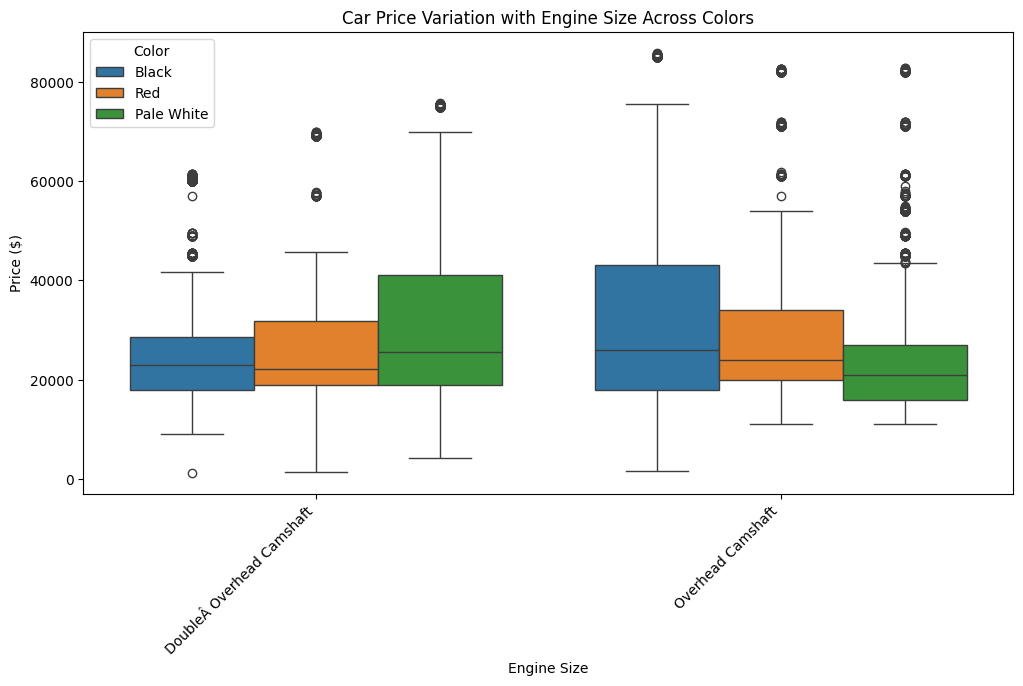

The car color with the highest price variation is: Red
The amount of variation is: 15519.360962404155


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df2)
plt.title('Car Price Variation with Engine Size Across Colors')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate price variation (standard deviation) for each color
price_variation_by_color = df2.groupby('Color')['Price ($)'].std()

# Find the color with the highest price variation
highest_variation_color = price_variation_by_color.idxmax()
highest_variation_amount = price_variation_by_color.max()

print(f"The car color with the highest price variation is: {highest_variation_color}")
print(f"The amount of variation is: {highest_variation_amount}")


12. Is there any seasonal trend in car sales based on the date of sale

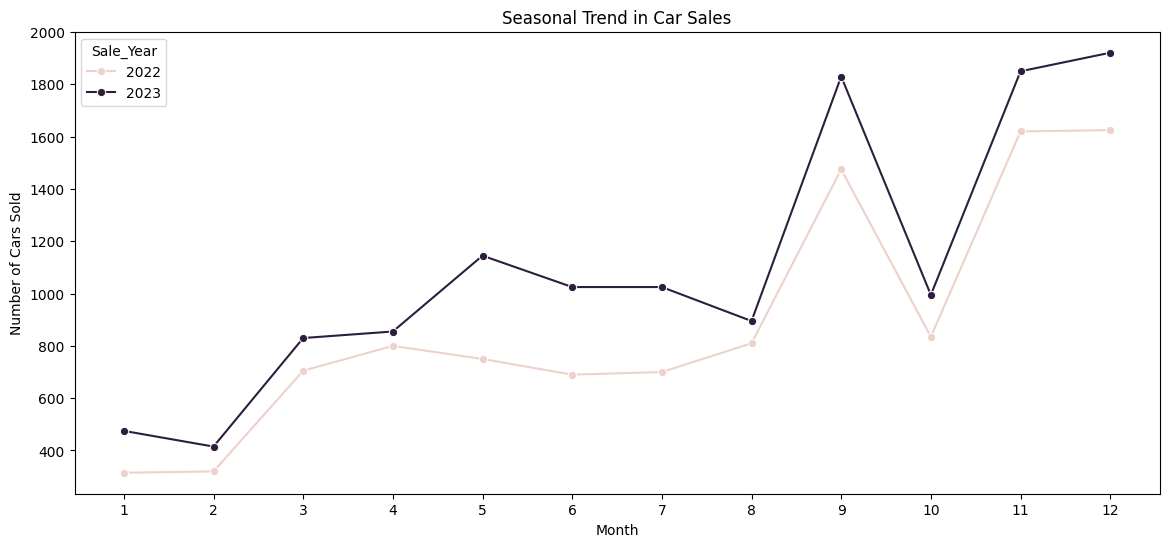

In [52]:
# prompt: Is there any seasonal trend in car sales based on the date of sale

# Convert the 'Sale Date' column to datetime objects
df2['Sale_Date'] = pd.to_datetime(df2['Date'])

# Extract month and year from the 'Sale Date'
df2['Sale_Month'] = df2['Sale_Date'].dt.month
df2['Sale_Year'] = df2['Sale_Date'].dt.year

# Group data by month and year and count the number of sales
monthly_sales = df2.groupby(['Sale_Year', 'Sale_Month'])['Price ($)'].count().reset_index()

# Create a time series plot to visualize the trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='Sale_Month', y='Price ($)', hue='Sale_Year', data=monthly_sales, marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.show()


13. How does the car price distribution change when considering different combinations of body style and
transmission type

                                 mean   median           std    min    max
Body Style Transmission                                                   
Hardtop    Auto          31520.188210  27000.0  13687.756740  12000  75501
           Manual        27016.943698  22001.0  14072.501848  11000  82500
Hatchback  Auto          25910.544824  21500.0  13144.014337   4200  75700
           Manual        28702.550562  23000.0  16284.049616   1700  85600
Passenger  Auto          28915.835149  25000.0  13946.481932   9000  69801
           Manual        28969.521039  22000.0  18523.684163  10000  85800
SUV        Auto          27501.404407  25000.0  13299.927913   1200  75501
           Manual        26079.019161  22000.0  14621.526541   2200  85500
Sedan      Auto          29955.294344  26000.0  14310.910860  12000  69980
           Manual        29664.271572  25000.0  15440.056434  11000  69700


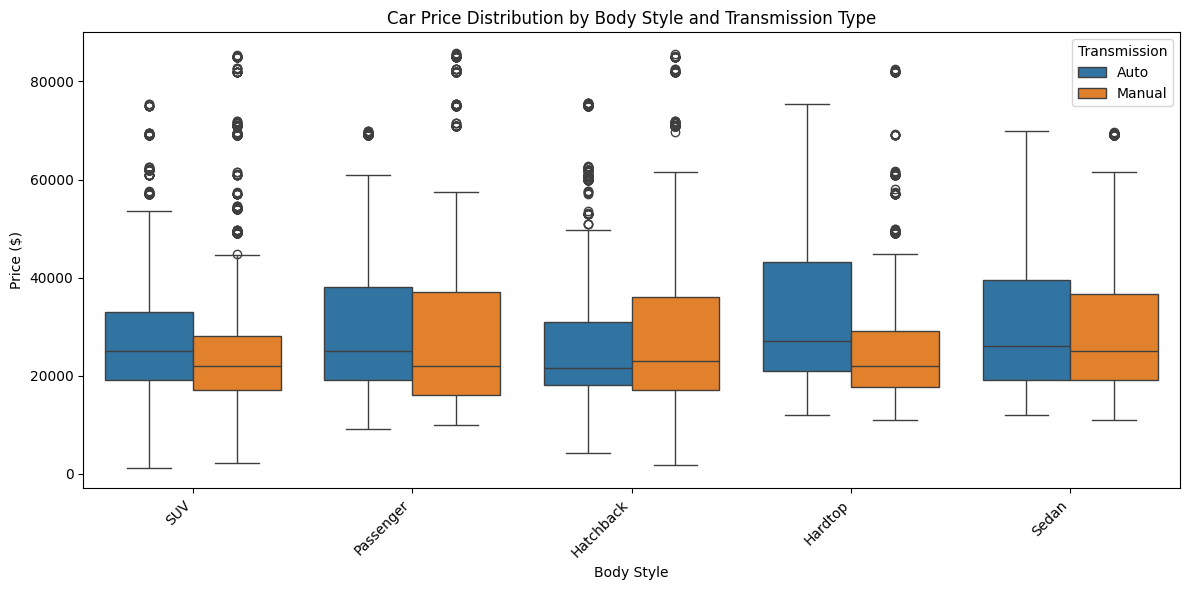

In [53]:
price_distribution = df2.groupby(['Body Style', 'Transmission'])['Price ($)'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the price distribution statistics
print(price_distribution)


# Create a box plot to visualize the price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


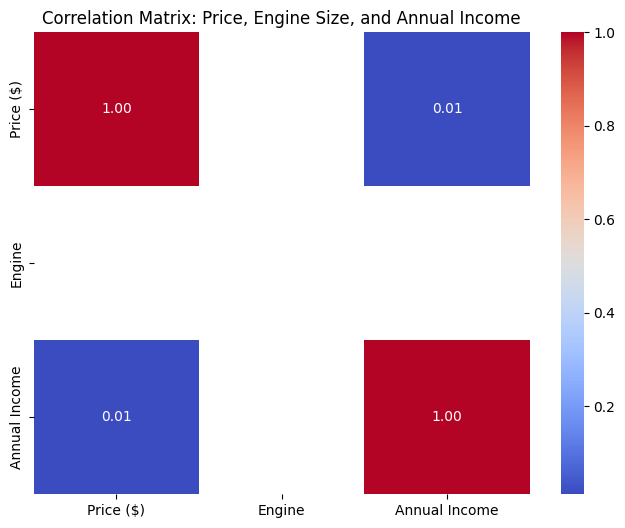

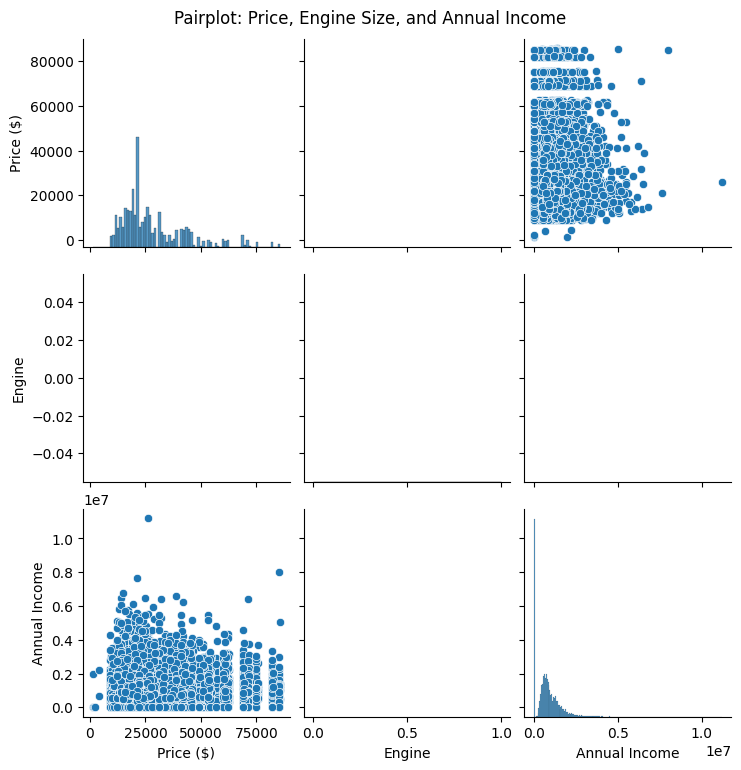

In [54]:
df2['Engine'] = pd.to_numeric(df2['Engine'], errors='coerce')  # Convert to numbers, invalid parsing will be set as NaN
df2['Annual Income'] = pd.to_numeric(df2['Annual Income'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df2[['Price ($)', 'Engine', 'Annual Income']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price, Engine Size, and Annual Income')
plt.show()

# Explore interactions using a pairplot
sns.pairplot(df2[['Price ($)', 'Engine', 'Annual Income']])
plt.suptitle('Pairplot: Price, Engine Size, and Annual Income', y=1.02)
plt.show()

15.  How does the average car price vary across different car models and engine types

In [55]:
# Split name into model and engine_type (assumption: engine type is the last word)
df['engine_type'] = df['name'].apply(lambda x: x.split()[-1] if x.split()[-1].lower() in ['petrol', 'diesel', 'electric', 'cng'] else 'unknown')
df['car_model'] = df['name'].apply(lambda x: ' '.join(x.split()[:-1]) if df['engine_type'].iloc[0] != 'unknown' else x)

In [56]:
grouped = df.groupby(['car_model', 'engine_type'])['selling_price'].mean().reset_index()
grouped.rename(columns={'selling_price': 'average_selling_price'}, inplace=True)


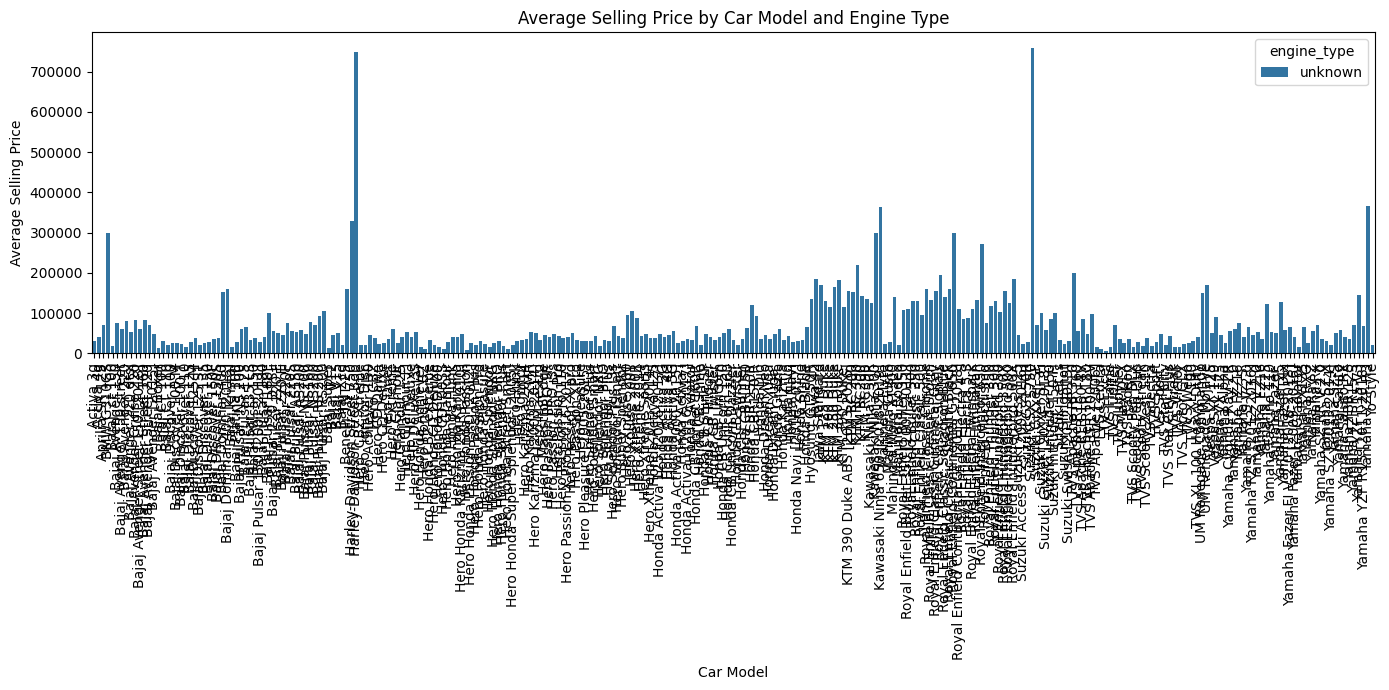

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='car_model', y='average_selling_price', hue='engine_type')
plt.xticks(rotation=90)
plt.title("Average Selling Price by Car Model and Engine Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Car Model")
plt.tight_layout()
plt.show()


In [58]:
df.car_model.nunique()

279